In [1]:
import gym
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [2]:
env = gym.make('MountainCarContinuous-v0')

env.seed(101)
np.random.seed(101)

print('observation space:', env.observation_space)
print('action space:', env.action_space)
print('  - low:', env.action_space.low)
print('  - high:', env.action_space.high)

observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
action space: Box([-1.], [1.], (1,), float32)
  - low: [-1.]
  - high: [1.]


In [3]:
env.reset()
for _ in range(1000):
    env.render()
    a = env.action_space.sample()
    o,r,d,p = env.step([a]) # take a random action
env.close()

In [21]:
Position = ctrl.Antecedent(np.arange(-1.2, 0.7,0.1), 'Position')
Speed = ctrl.Antecedent(np.arange(-0.07, 0.07, 0.01), 'Speed')
Power = ctrl.Consequent(np.arange(-1, 1.1, 0.1), 'Power')

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


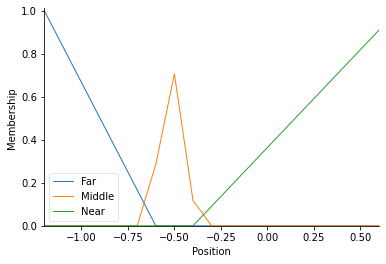

In [33]:
# Custom membership functions can be built interactively with a familiar, pythonic API
Position['Far']   = fuzz.trimf(Position.universe, [-1.3, -1.2, -0.6])
Position['Middle']   = fuzz.trimf(Position.universe, [-0.62, -0.55, -0.38])
Position['Near']   = fuzz.trimf(Position.universe, [-0.4, 0.7, 0.7])

Position.view()

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


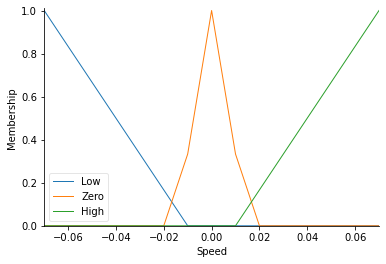

In [34]:
Speed['Low']   = fuzz.trimf(Speed.universe, [-0.07, -0.07, -0.01])
Speed['Zero']   = fuzz.trimf(Speed.universe, [-0.015, 0.0, 0.015])
Speed['High']   = fuzz.trimf(Speed.universe, [0.01, 0.07, 0.07])

Speed.view()

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


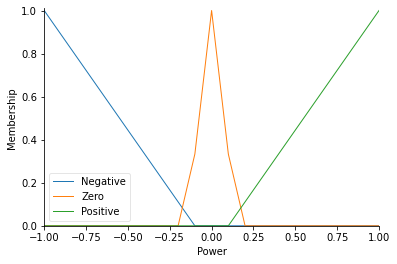

In [35]:
Power['Negative']   = fuzz.trimf(Power.universe, [-1, -1, -0.1])
Power['Zero']   = fuzz.trimf(Power.universe, [-0.15, 0.0, 0.15])
Power['Positive']   = fuzz.trimf(Power.universe, [0.1, 1, 1])

Power.view()

In [ ]:
rule1 = ctrl.Rule(Position['Middle'] & Speed['Low'] , Power['Negative'])
rule2 = ctrl.Rule(Position['Middle'] & Speed['Zero'], Power['Negative'])
rule3 = ctrl.Rule(Position['Far'] , Power['Positive'])
rule4 = ctrl.Rule(Position['Middle'] & Speed['High'], Power['Positive'])
rule5 = ctrl.Rule(Position['Near'], Power['Positive'])

In [129]:
Car_Ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

In [113]:
Car = ctrl.ControlSystemSimulation(Car_Ctrl)

-0.4882079 - 0.0006240395
-0.48885518 - -0.00064728915
-0.49076977 - -0.0019145793
-0.49393967 - -0.0031698875
-0.4983449 - -0.0044052373
-0.5039575 - -0.0056125955
-0.5107215 - -0.0067639723
-0.518569 - -0.007847463
-0.5274233 - -0.008854323
-0.5372004 - -0.009777042
-0.5478097 - -0.010609318
-0.5591617 - -0.011352006
-0.57116437 - -0.012002618
-0.5837218 - -0.012557444
-0.59673554 - -0.013013739
-0.6101053 - -0.0133697465
-0.62359476 - -0.013489471
-0.6369527 - -0.0133579485
-0.6498989 - -0.012946218
-0.66214585 - -0.0122469375
-0.67340165 - -0.011255797
-0.6833733 - -0.009971648
-0.6917731 - -0.008399819
-0.69833046 - -0.0065573677
-0.70281017 - -0.004479694
-0.70512855 - -0.0023184062
-0.7052696 - -0.00014099696
-0.70323217 - 0.0020373908
-0.6990306 - 0.004201618
-0.6927247 - 0.0063059027
-0.68454367 - 0.008181037
-0.67475486 - 0.009788825
-0.6636446 - 0.011110255
-0.65150577 - 0.0121388445
-0.6386306 - 0.012875152
-0.62530744 - 0.013323211
-0.6117446 - 0.01356284
-0.5980206 - 0.01

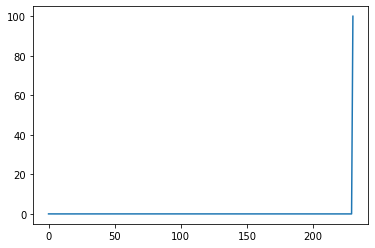

In [137]:
env.reset()

Car.input['Position'] = -0.2
Car.input['Speed'] = -0.02 
Car.compute()
a = Car.output['Power']
Rewards = []
for _ in range(250):
    env.render()
    
    #print(a)
    
    State,Reward,Done,tmp = env.step([a]) # take a random action
    print(State[0] , '-' , State[1])
    Car.input['Position'] = State[0]
    Car.input['Speed'] = State[1]
    Car.compute()
    a = Car.output['Power']
    
    Rewards.append(Reward)
    
    if Done == True:
        break
    
env.close()
plt.plot(Rewards)